<a href="https://colab.research.google.com/github/yasirabd/solver-society-job-data/blob/main/5_Analisis_data_jobstreet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objectives
Exploratory Data Analysis pada data jobstreet.

Data input yang dibutuhkan:
1. data_master_16oct.csv (hasil colab 3_1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/drive/My Drive/Data Loker/data_master_16oct.csv')
df.head()

,id_loker,pulau,provinsi,job_position,company_name,years_of_experience,years_of_experience_cat,average_processing_time,company_industry,company_size,work_environment_waktu_bekerja,work_environment_gaya_berpakaian,work_environment_gaya_berpakaian_contoh,work_environment_tunjangan,work_environment_bahasa,platform,pendidikan,jumlah_loker_per_provinsi
0,1,Jawa,Daerah Khusus Ibukota Jakarta,Spv Finance,PT Axindo Infotama,3,0 - 4 tahun,6,INDUSTRI PENGOLAHAN,51 - 200 pekerja,sabtu,formal,kemeja polos & dasi,"kesehatan, umum",Indonesia,jobstreet,D3,5985
1,2,Jawa,Daerah Khusus Ibukota Jakarta,Qualitative Research Executive,Perusahaan Dirahasiakan,3,0 - 4 tahun,tidak tersedia,TIDAK TERSEDIA,tidak spesifik,tidak tersedia,tidak spesifik,tidak spesifik,tidak tersedia,Tidak Dicantumkan,jobstreet,S1,5985
2,3,Jawa,Jawa Tengah,Field Collection Wonogiri,OTO Group,0,0 - 4 tahun,14,KEUANGAN DAN ASURANSI,lebih dari 5000 pekerja,senin - jumat,bisnis,kemeja,"kesehatan, bonus",Indonesia,jobstreet,"D3, S1, SMA",548
3,4,Jawa,Daerah Khusus Ibukota Jakarta,Perawat Di Negara Jerman,PT Jerman Manajemen,1,0 - 4 tahun,11,PENDIDIKAN,51 - 200 pekerja,sabtu - kamis,formal,kemeja polos & dasi,kesehatan,Indonesia,jobstreet,D3,5985
4,5,Jawa,Jawa Tengah,Field Collection Pati,OTO Group,0,0 - 4 tahun,14,KEUANGAN DAN ASURANSI,lebih dari 5000 pekerja,senin - jumat,bisnis,kemeja,"kesehatan, bonus",Indonesia,jobstreet,"D3, S1, SMA",548


In [3]:
# check null values
df.isnull().sum()

id_loker                                   0
pulau                                      0
provinsi                                   0
job_position                               0
company_name                               0
years_of_experience                        0
years_of_experience_cat                    0
average_processing_time                    0
company_industry                           0
company_size                               0
work_environment_waktu_bekerja             0
work_environment_gaya_berpakaian           0
work_environment_gaya_berpakaian_contoh    0
work_environment_tunjangan                 0
work_environment_bahasa                    0
platform                                   0
pendidikan                                 0
jumlah_loker_per_provinsi                  0
dtype: int64

In [4]:
df.shape

(12625, 18)

# Exploratory Data Analysis

In [5]:
data = df.copy()

## Berapa jumlah job_position tiap pulau?

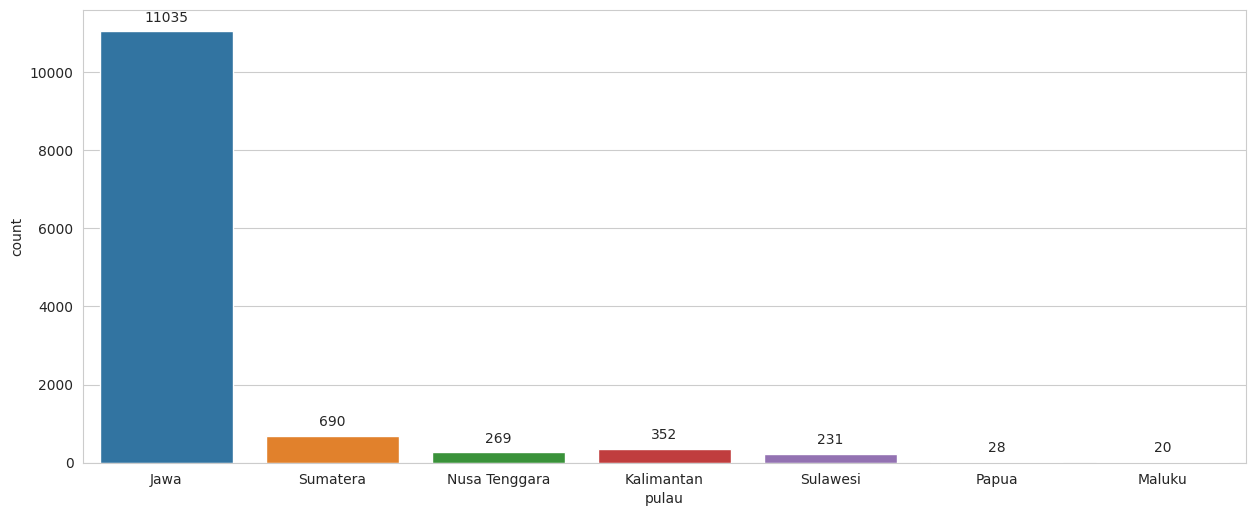

In [6]:
plt.figure(figsize=(15,6),dpi=100)
jobpulau = sns.countplot(data.pulau);

for p in jobpulau.patches:
    jobpulau.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

## Berapa jumlah job_position pada tiap provinsi di jawa?

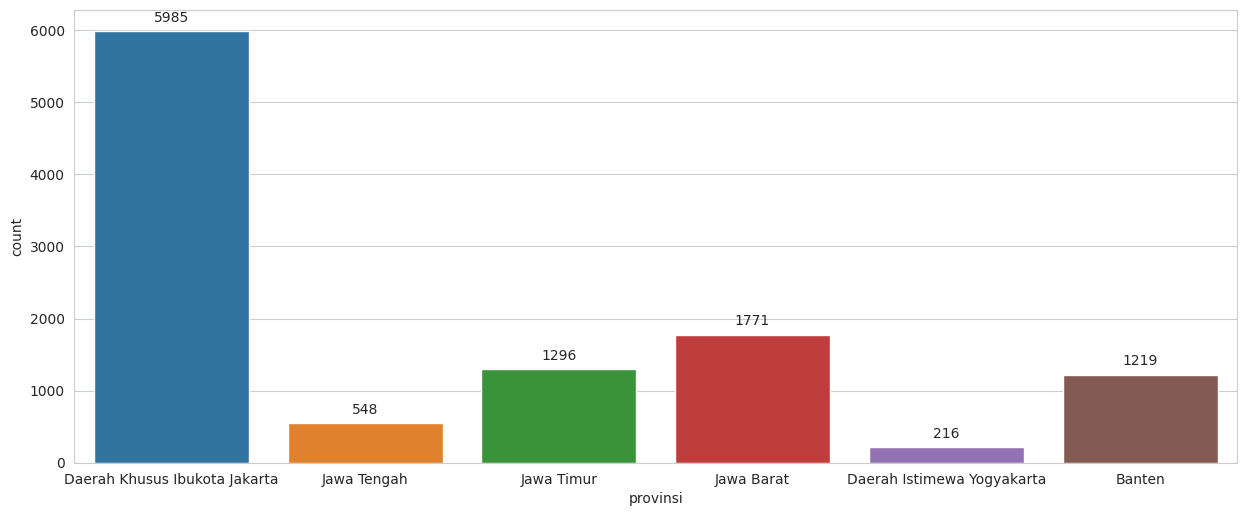

In [7]:
plt.figure(figsize=(15,6),dpi=100)
loker_jawa = data[data.pulau == 'Jawa']
job_jawa_prov = sns.countplot(loker_jawa.provinsi);

for p in job_jawa_prov.patches:
    job_jawa_prov.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points');

## Apa top 5 job_position yang paling dicari pada tiap pulau?

In [8]:
pulau_job = data[['pulau', 'job_position']]
pulau_job['pulau'].unique()

array(['Jawa', 'Sumatera', 'Nusa Tenggara', 'Kalimantan', 'Sulawesi',
       'Papua', 'Maluku'], dtype=object)

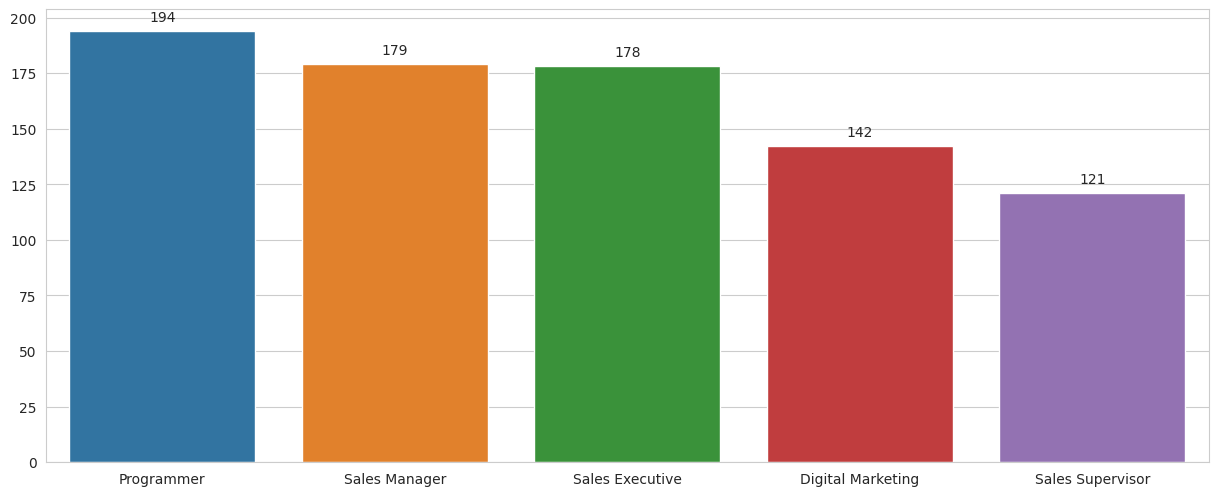

In [9]:
plt.figure(figsize=(15,6), dpi=100)

slice_jp = data['job_position'].value_counts()[:5]
sns_jp = sns.barplot(slice_jp.index, slice_jp.values)

for p in sns_jp.patches:
    sns_jp.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points');

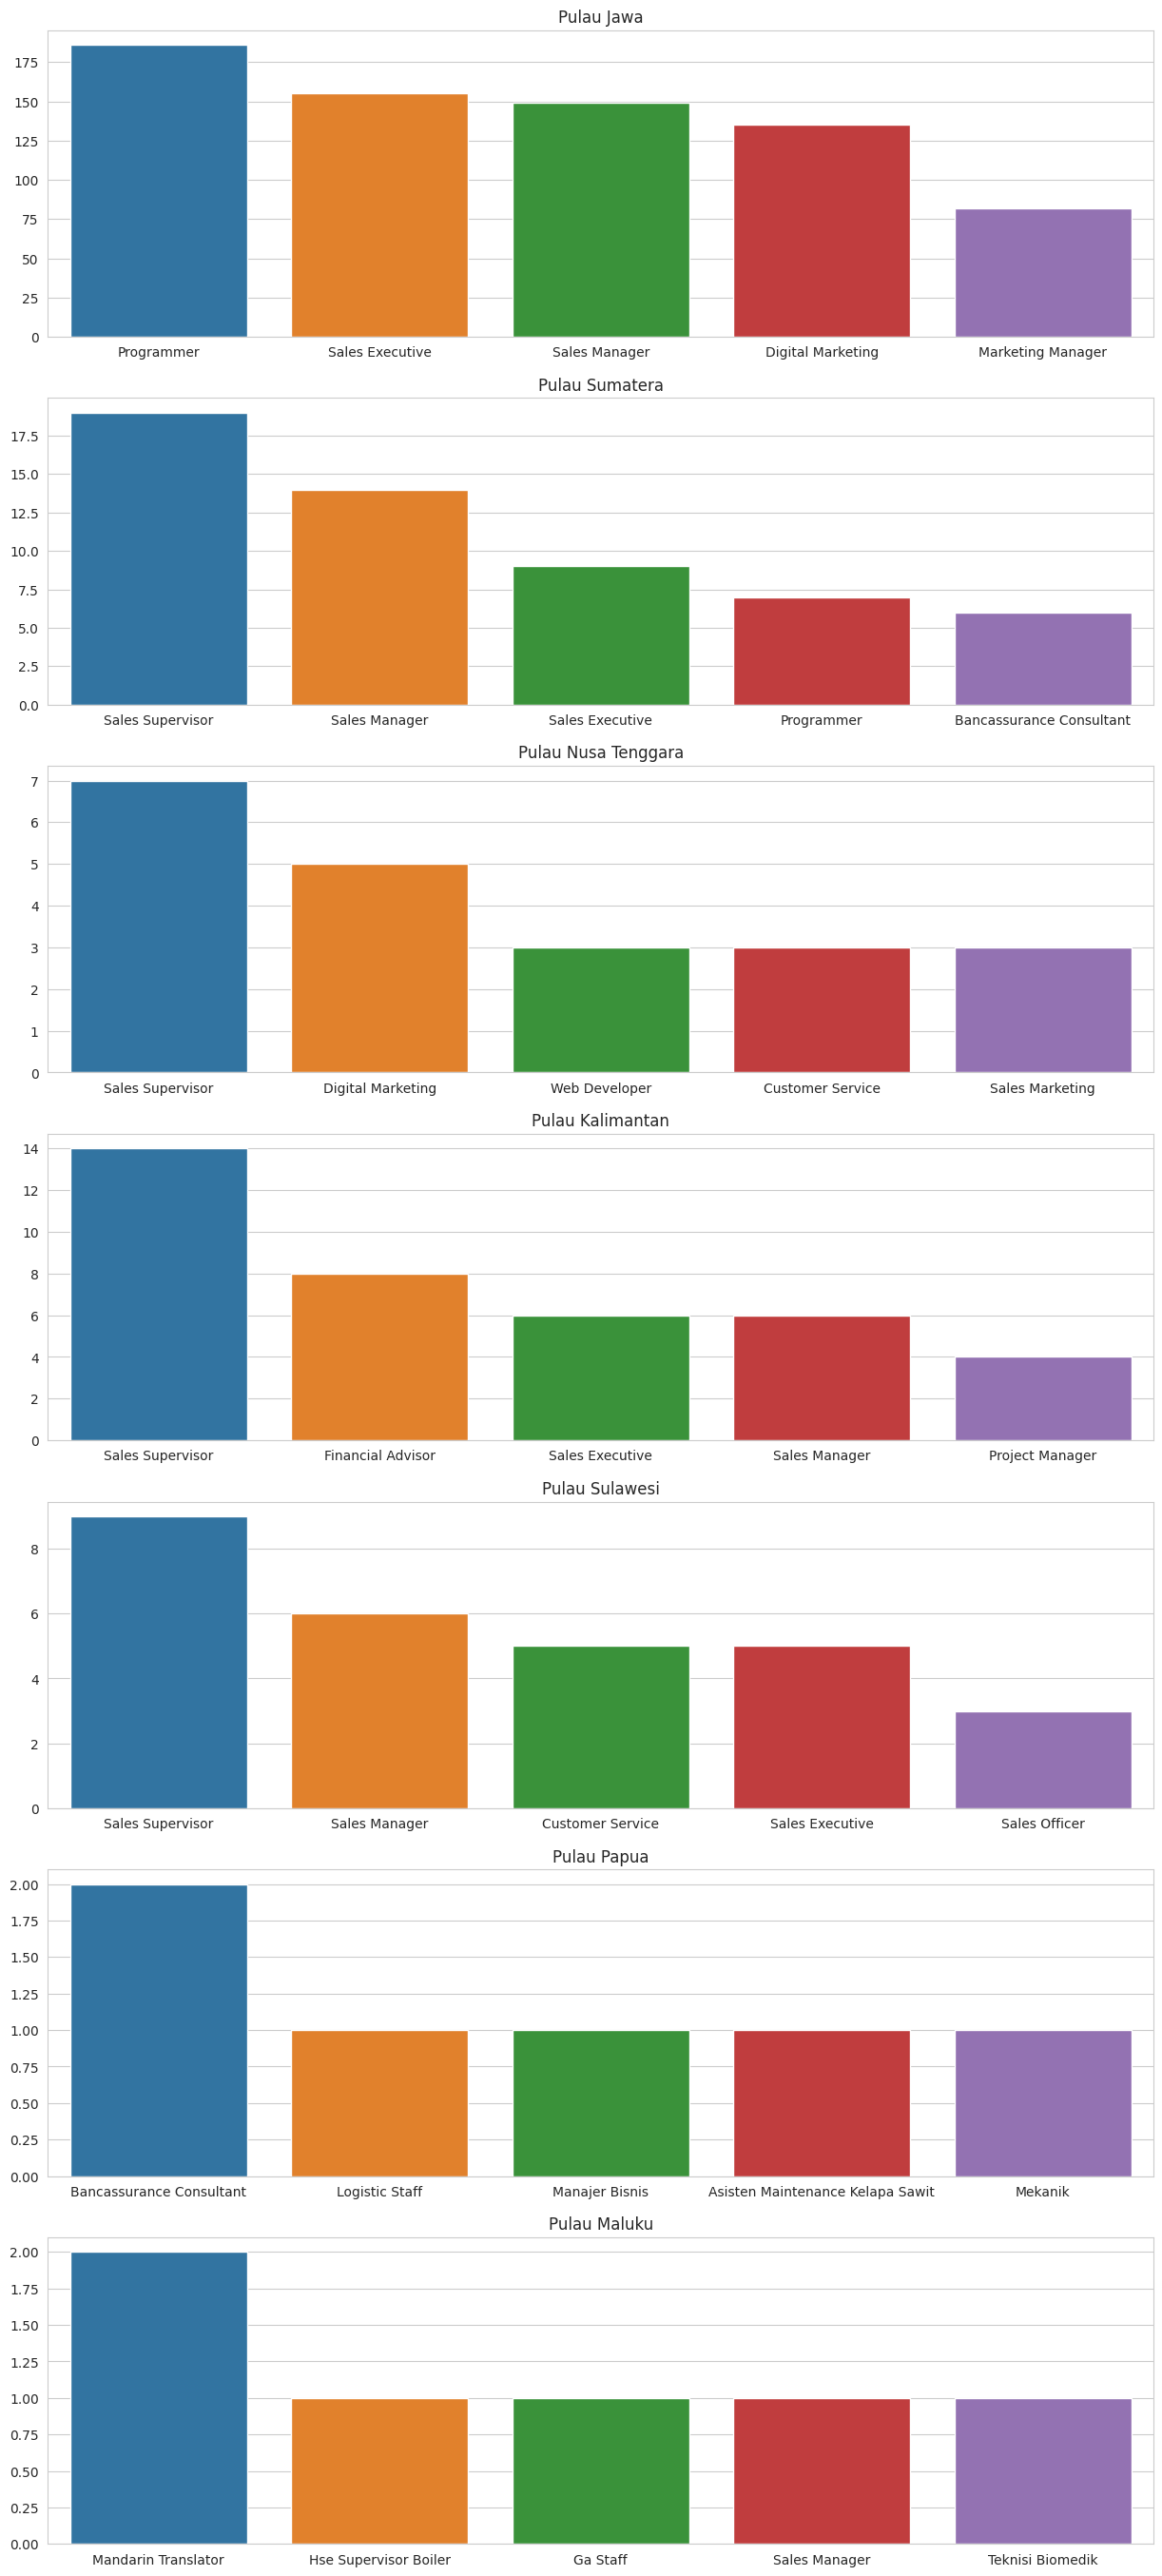

In [10]:
fig, axes = plt.subplots(7, 1, figsize=(15, 35), dpi=100)

for idx, pul in enumerate(list(pulau_job['pulau'].unique())):
    # slice data tiap pulau
    p = pulau_job[pulau_job.pulau == pul]
    top_5 = p.job_position.value_counts()[:5]

    sns.barplot(top_5.index, top_5.values, ax=axes[idx]).set_title('Pulau '+pul)

## Industri apa yang banyak membuka loker? top 10

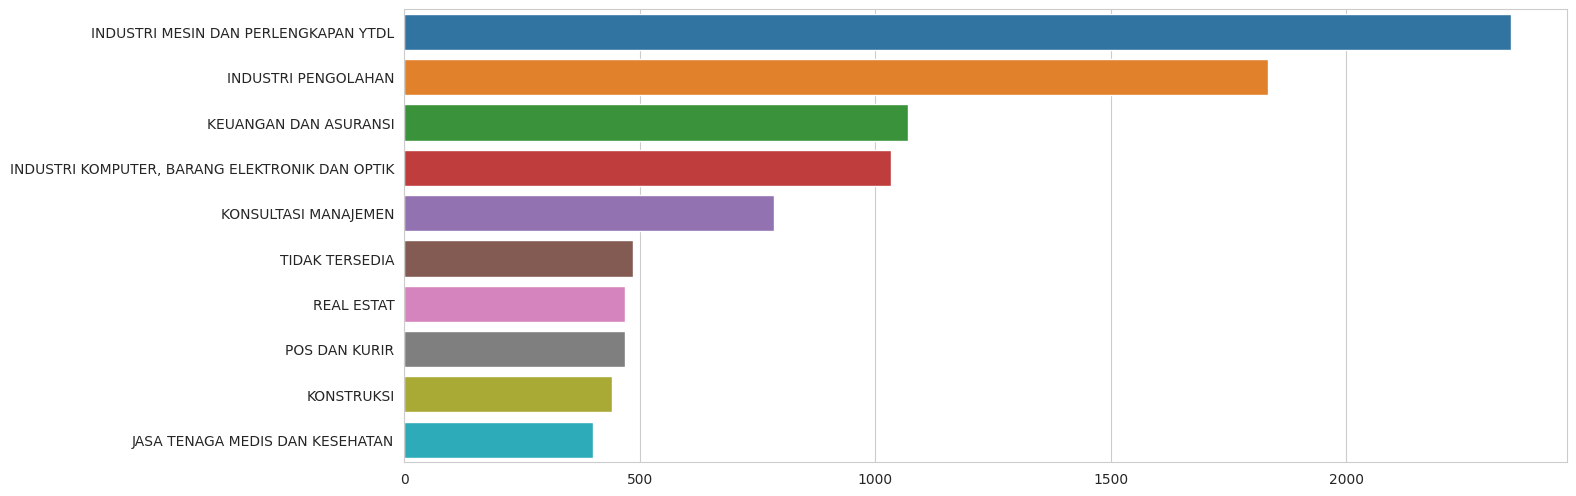

In [11]:
industri = data['company_industry'].value_counts()[:10]

plt.figure(figsize=(15,6), dpi=100)
sns.barplot(industri.values, industri.index);

In [12]:
industri

INDUSTRI MESIN DAN PERLENGKAPAN YTDL              2350
INDUSTRI PENGOLAHAN                               1834
KEUANGAN DAN ASURANSI                             1070
INDUSTRI KOMPUTER, BARANG ELEKTRONIK DAN OPTIK    1033
KONSULTASI MANAJEMEN                               786
TIDAK TERSEDIA                                     486
REAL ESTAT                                         469
POS DAN KURIR                                      468
KONSTRUKSI                                         442
JASA TENAGA MEDIS DAN KESEHATAN                    400
Name: company_industry, dtype: int64

## Apa job position yang paling dicari pada INDUSTRI MESIN DAN PERLENGKAPAN YTDL?

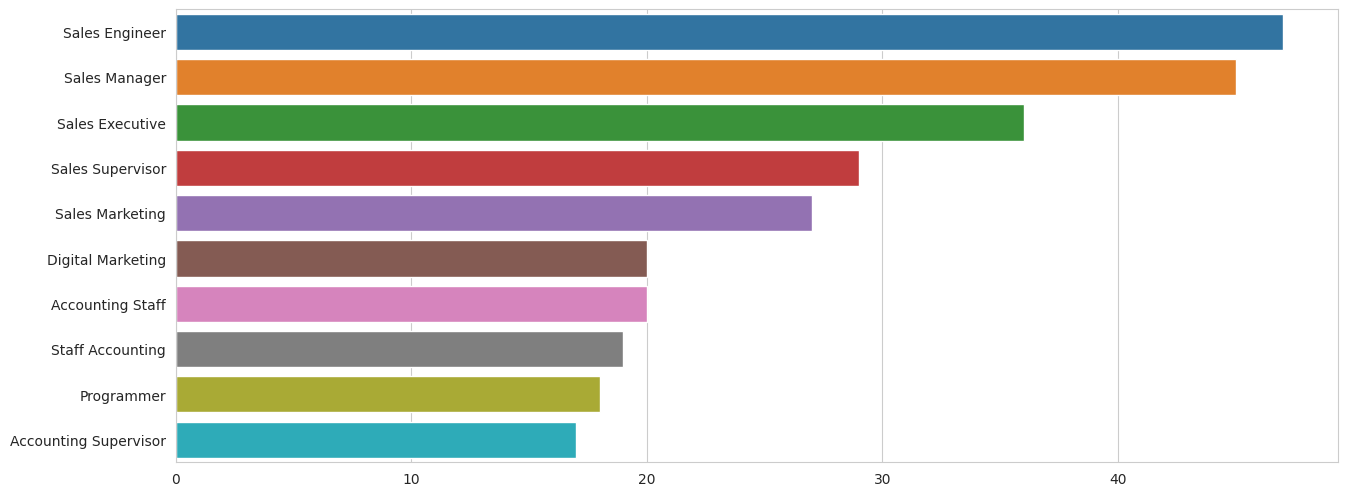

In [13]:
job_industri = data[['job_position', 'company_industry']]

industri_mesin = job_industri[job_industri['company_industry'] == "INDUSTRI MESIN DAN PERLENGKAPAN YTDL"]
top10_job_mesin = industri_mesin['job_position'].value_counts()[:10]
top10_job_mesin
plt.figure(figsize=(15,6), dpi=100)
sns.barplot(top10_job_mesin.values, top10_job_mesin.index);

In [14]:
top10_job_mesin

Sales Engineer           47
Sales Manager            45
Sales Executive          36
Sales Supervisor         29
Sales Marketing          27
Digital Marketing        20
Accounting Staff         20
Staff Accounting         19
Programmer               18
Accounting Supervisor    17
Name: job_position, dtype: int64

## Company_size ditampilkan sekedip, ngasih tau aja

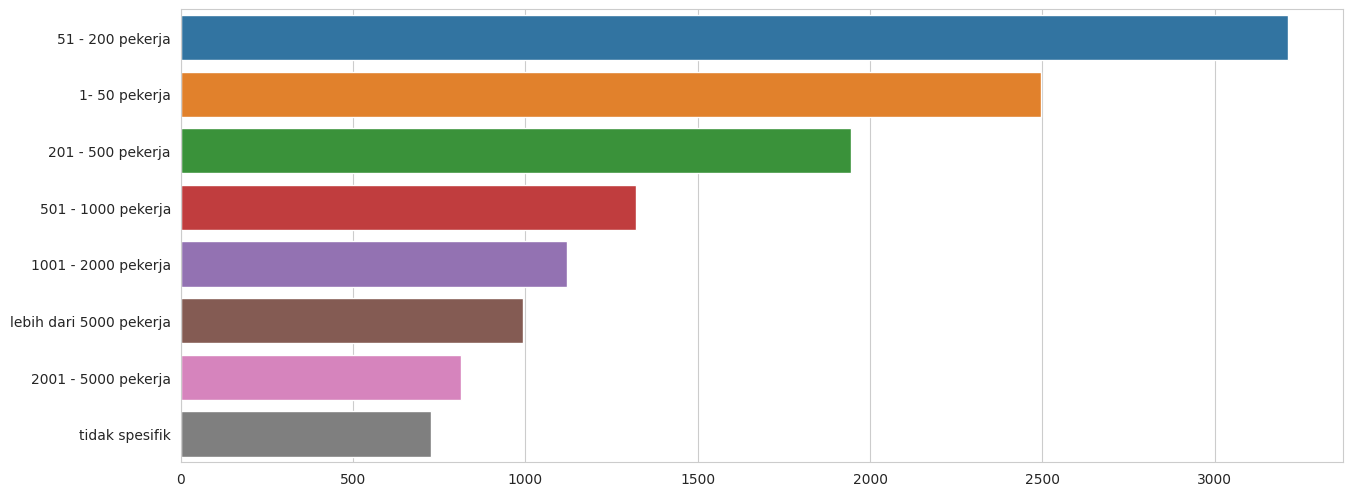

In [15]:
c_size = data['company_size'].value_counts()

plt.figure(figsize=(15,6), dpi=100)
csize_plot = sns.barplot(c_size.values, c_size.index)

## Bagaimana kriteria minimum pendidikan tiap pulau? 

In [16]:
df_pendidikan = pd.DataFrame(columns=['id_loker', 'pulau', 'provinsi', 'pendidikan'])

for idx, row in data.iterrows():

    split_pendidikan = [d.strip().upper() for d in row['pendidikan'].split(',')]
    
    for pend in split_pendidikan:
        df_pendidikan = df_pendidikan.append({'id_loker': row['id_loker'],
                                              'pulau': row['pulau'],
                                              'provinsi': row['provinsi'],
                                              'pendidikan': pend}, ignore_index=True)

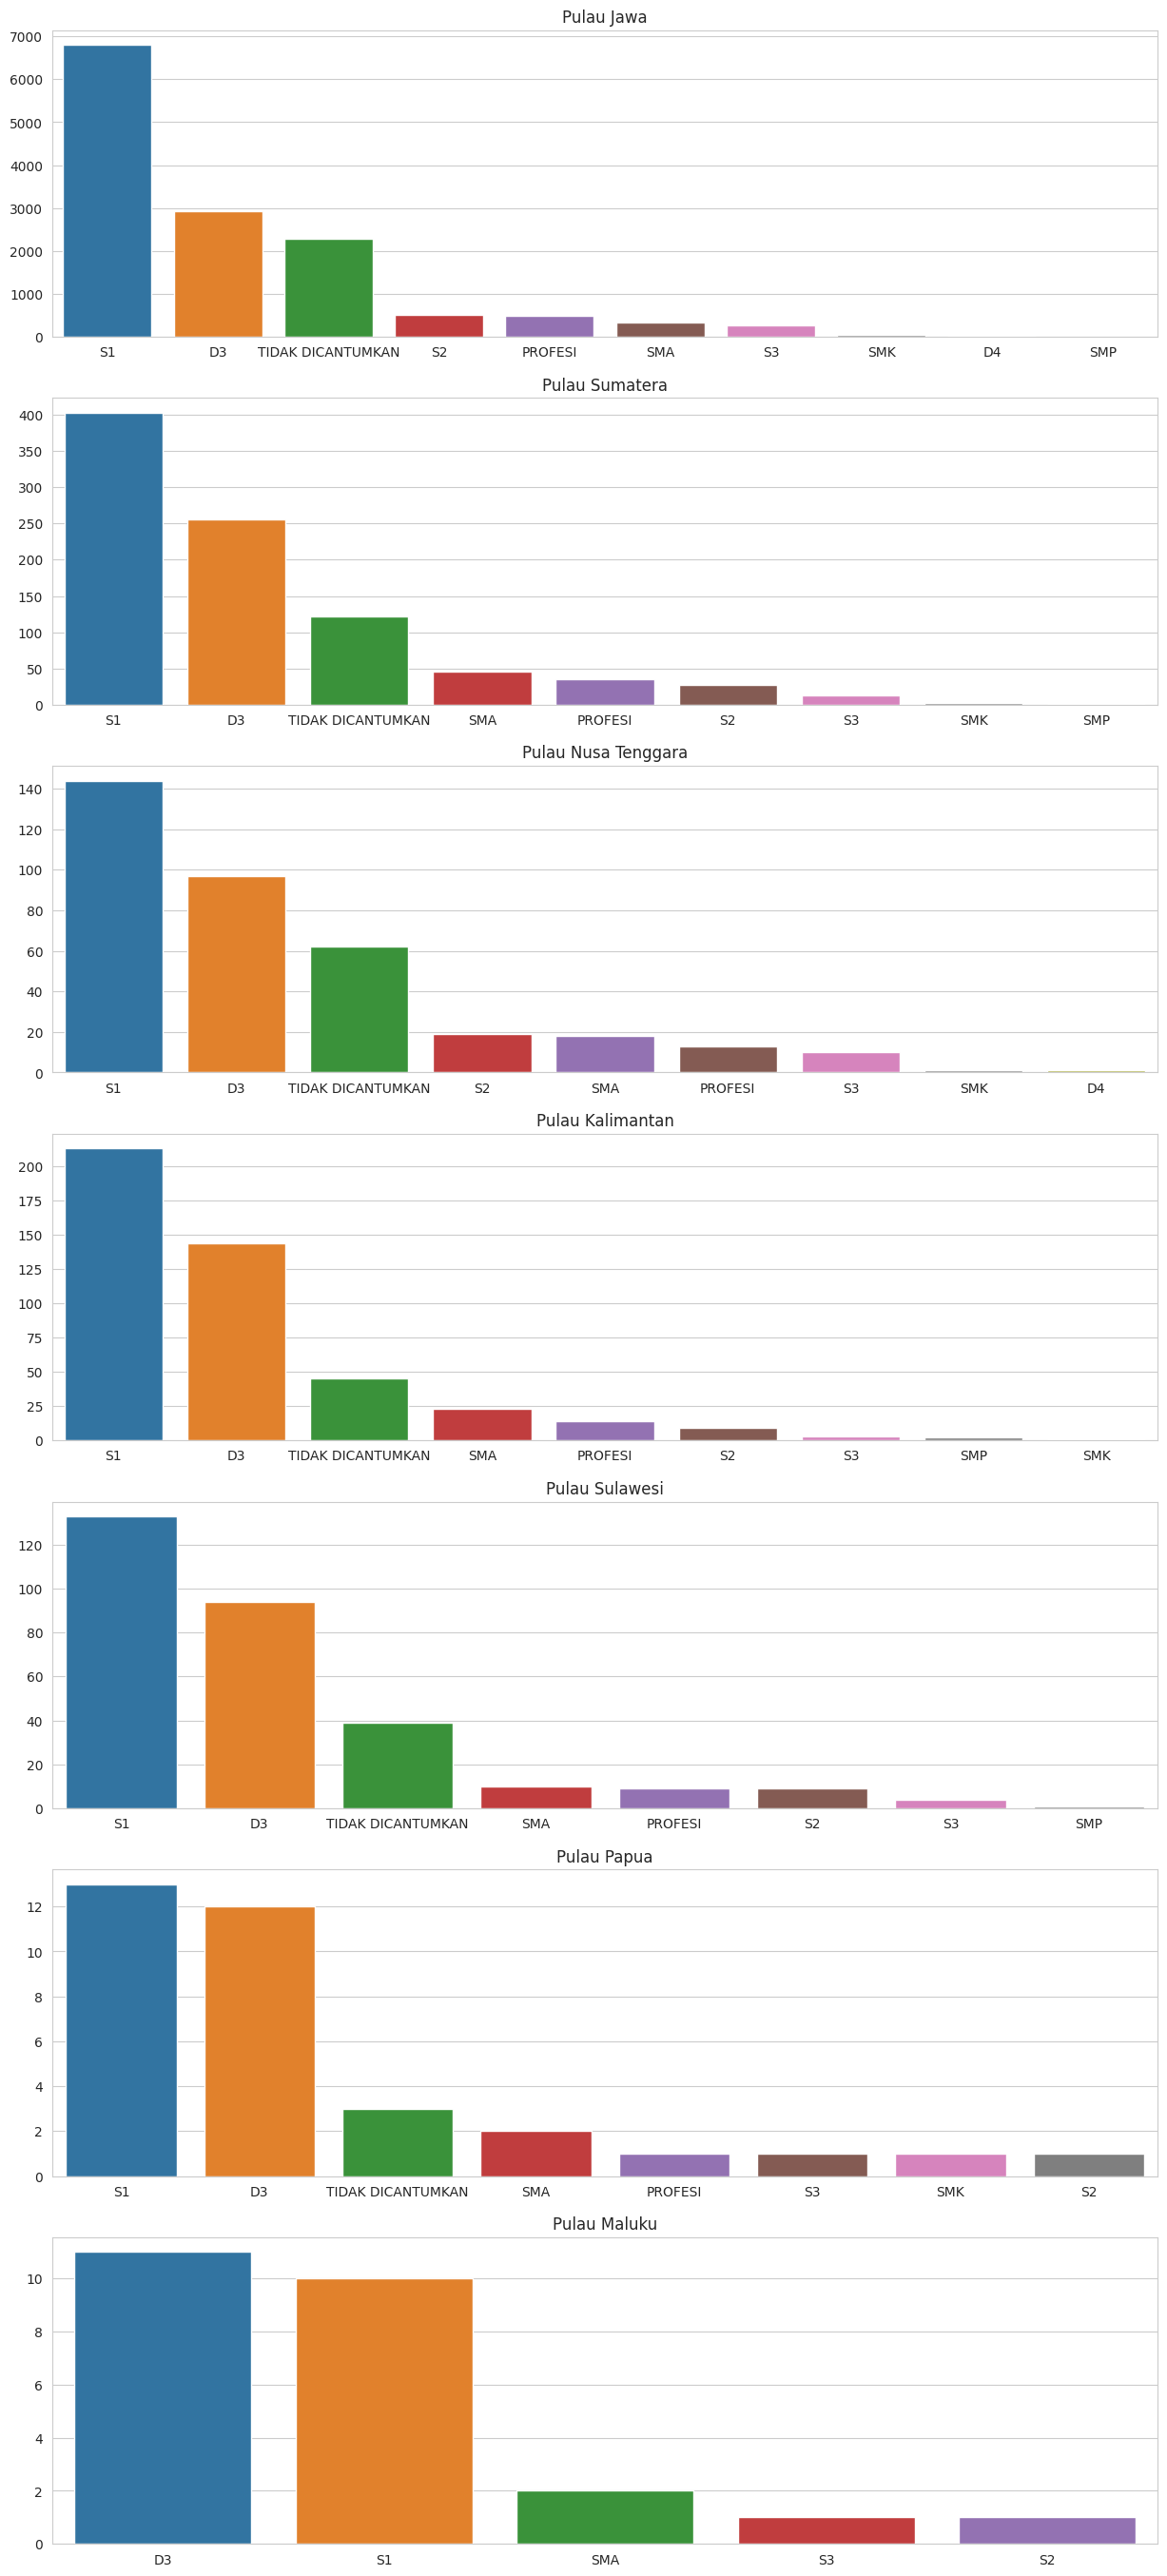

In [17]:
fig, axes = plt.subplots(7,1,figsize=(15,35), dpi=100)

for idx, pul in enumerate(list(pulau_job['pulau'].unique())):
    # slice data tiap pulau
    pl = df_pendidikan[df_pendidikan.pulau == pul]
    slice_pendidikan = pl.pendidikan.value_counts()
    sns.barplot(slice_pendidikan.index, slice_pendidikan.values, ax=axes[idx]).set_title('Pulau '+pul)

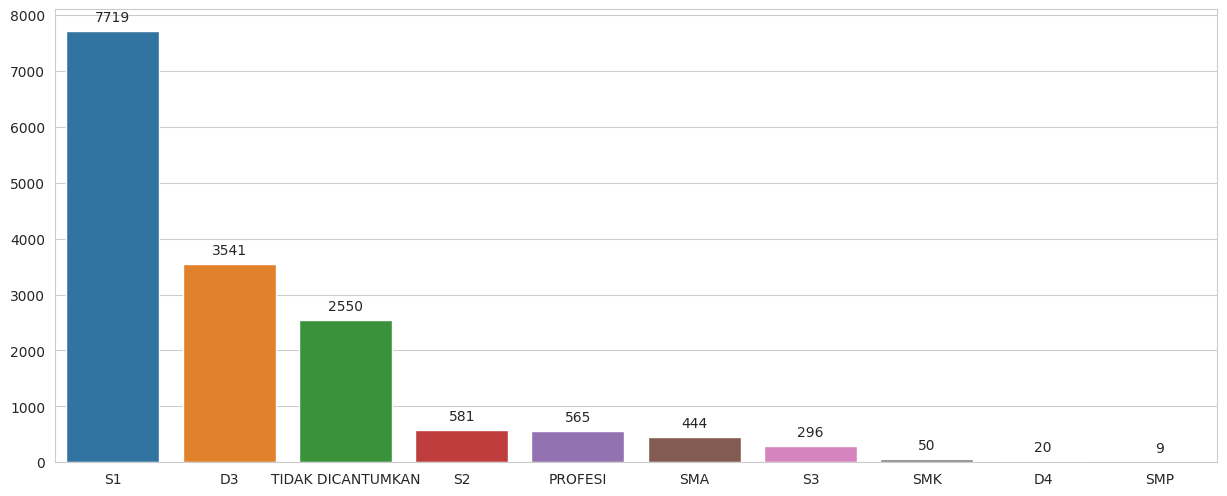

In [18]:
plt.figure(figsize=(15,6), dpi=100)

vc_pendidikan = df_pendidikan['pendidikan'].value_counts()
sns_pend = sns.barplot(vc_pendidikan.index, vc_pendidikan.values)

for p in sns_pend.patches:
    sns_pend.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points');

## Berapa minimal tahun pengalaman yang dibutuhkan untuk mendapatkan loker pada top 5 job_position yang dibuka? 

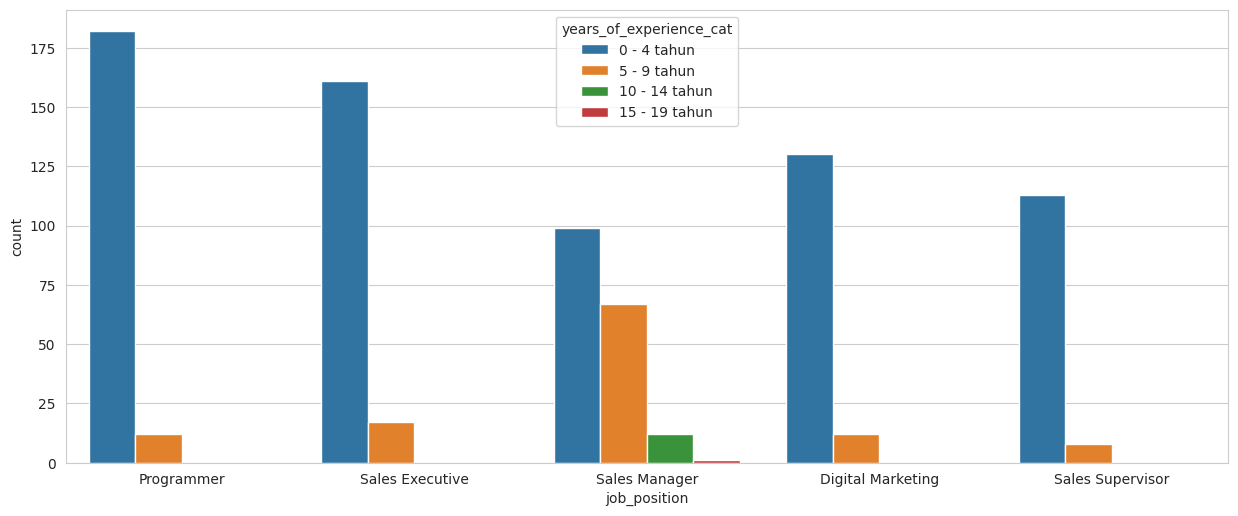

In [19]:
# top 5 job position
plt.figure(figsize=(15,6), dpi=100)

top_job_pos = data['job_position'].value_counts()[:5]
list_top_job = top_job_pos.index.tolist()

slice_job_pos = data[data.job_position.isin(list_top_job)]

sns.countplot(slice_job_pos.job_position, hue=slice_job_pos.years_of_experience_cat)

## Bagaimana company_size dari top 3 industri?

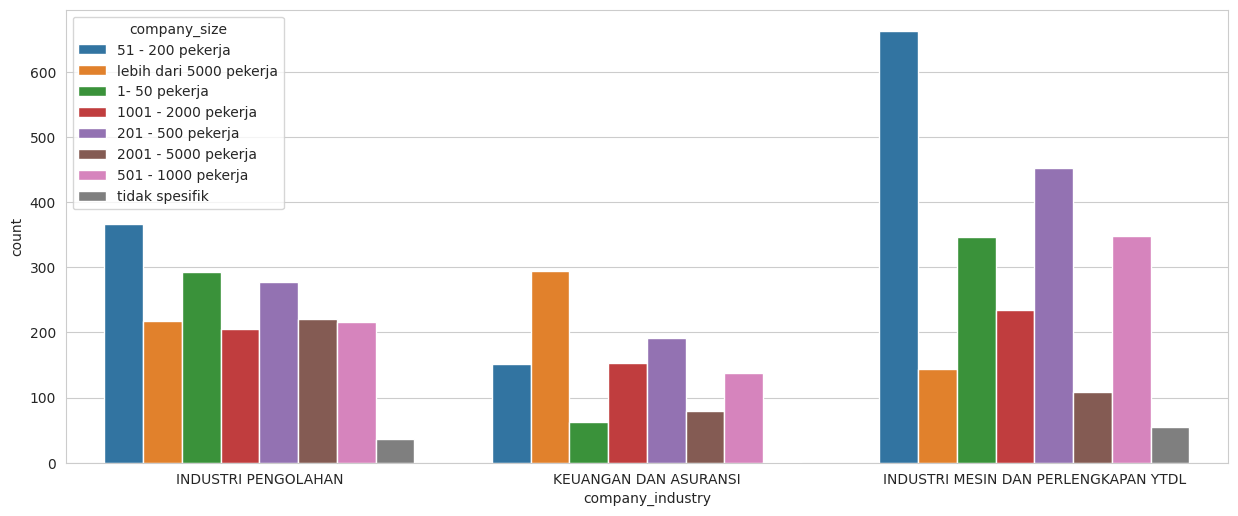

In [20]:
# top 3 company_industry
plt.figure(figsize=(15,6), dpi=100)

top_com_industry = data['company_industry'].value_counts()[:3]
list_top_industry = top_com_industry.index.tolist()

slice_industry = data[data.company_industry.isin(list_top_industry)]

sns.countplot(slice_industry.company_industry, hue=slice_industry.company_size)

## Apakah bahasa yang harus dikuasai untuk mendaftar top 5 job_position?

In [21]:
df_bahasa = pd.DataFrame(columns=['id_loker', 'job_position', 'bahasa'])

for idx, row in data.iterrows():

    split_bahasa = [d.strip().upper() for d in row['work_environment_bahasa'].split(',')]
    
    for bhs in split_bahasa:
        df_bahasa = df_bahasa.append({'id_loker': row['id_loker'],
                                      'job_position': row['job_position'],
                                      'bahasa': bhs}, ignore_index=True)

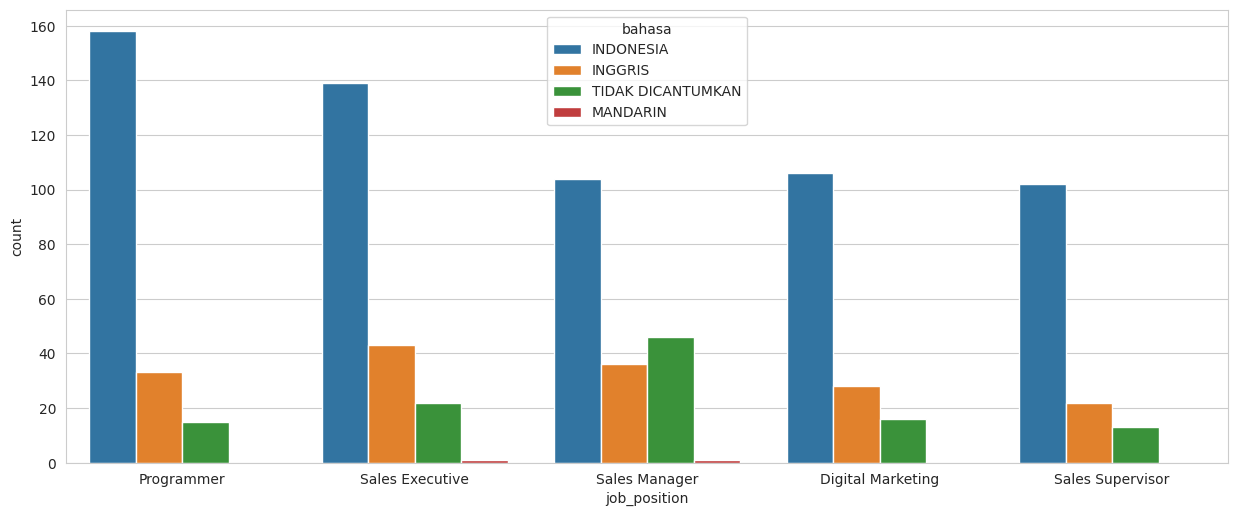

In [22]:
top_job_pos = data['job_position'].value_counts()[:5]
list_top_job = top_job_pos.index.tolist()

# slice data bahasa berdasarkan top job position
slice_bhs_top_job = df_bahasa[df_bahasa.job_position.isin(list_top_job)]

plt.figure(figsize=(15,6), dpi=100)
sns.countplot(slice_bhs_top_job.job_position, hue=slice_bhs_top_job.bahasa);

In [23]:
data.head()

,id_loker,pulau,provinsi,job_position,company_name,years_of_experience,years_of_experience_cat,average_processing_time,company_industry,company_size,work_environment_waktu_bekerja,work_environment_gaya_berpakaian,work_environment_gaya_berpakaian_contoh,work_environment_tunjangan,work_environment_bahasa,platform,pendidikan,jumlah_loker_per_provinsi
0,1,Jawa,Daerah Khusus Ibukota Jakarta,Spv Finance,PT Axindo Infotama,3,0 - 4 tahun,6,INDUSTRI PENGOLAHAN,51 - 200 pekerja,sabtu,formal,kemeja polos & dasi,"kesehatan, umum",Indonesia,jobstreet,D3,5985
1,2,Jawa,Daerah Khusus Ibukota Jakarta,Qualitative Research Executive,Perusahaan Dirahasiakan,3,0 - 4 tahun,tidak tersedia,TIDAK TERSEDIA,tidak spesifik,tidak tersedia,tidak spesifik,tidak spesifik,tidak tersedia,Tidak Dicantumkan,jobstreet,S1,5985
2,3,Jawa,Jawa Tengah,Field Collection Wonogiri,OTO Group,0,0 - 4 tahun,14,KEUANGAN DAN ASURANSI,lebih dari 5000 pekerja,senin - jumat,bisnis,kemeja,"kesehatan, bonus",Indonesia,jobstreet,"D3, S1, SMA",548
3,4,Jawa,Daerah Khusus Ibukota Jakarta,Perawat Di Negara Jerman,PT Jerman Manajemen,1,0 - 4 tahun,11,PENDIDIKAN,51 - 200 pekerja,sabtu - kamis,formal,kemeja polos & dasi,kesehatan,Indonesia,jobstreet,D3,5985
4,5,Jawa,Jawa Tengah,Field Collection Pati,OTO Group,0,0 - 4 tahun,14,KEUANGAN DAN ASURANSI,lebih dari 5000 pekerja,senin - jumat,bisnis,kemeja,"kesehatan, bonus",Indonesia,jobstreet,"D3, S1, SMA",548


In [24]:
data.describe(include='object').T

,count,unique,top,freq
pulau,12625,7,Jawa,11035
provinsi,12625,34,Daerah Khusus Ibukota Jakarta,5985
job_position,12625,6853,Programmer,194
company_name,12625,4805,Perusahaan Dirahasiakan,486
years_of_experience,12625,21,1,3691
years_of_experience_cat,12625,6,0 - 4 tahun,10421
average_processing_time,12625,15,14,9001
company_industry,12625,33,INDUSTRI MESIN DAN PERLENGKAPAN YTDL,2350
company_size,12625,8,51 - 200 pekerja,3212
work_environment_waktu_bekerja,12625,11,senin - jumat,7689


In [25]:
data.describe()

,id_loker,jumlah_loker_per_provinsi
count,12625.000000,12625.000000
mean,6313.000000,3379.328871
std,3644.667909,2516.706764
min,1.000000,1.000000
25%,3157.000000,1219.000000
50%,6313.000000,1771.000000
75%,9469.000000,5985.000000
max,12625.000000,5985.000000
